In [1]:
import os
import pickle
import numpy as np
import re
import emoji
import regex

## Load dataset

In [2]:
def extract_emojis(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

In [3]:
# load emoji list
fullfile = os.path.expanduser("~/Dropbox/insight/Emoji/"+'mySmileys.p')
with open(fullfile, 'rb') as fp:
    L = pickle.load(fp)
print(L)
print(len(L))
target_names = L

['😀', '😁', '😂', '🤣', '😃', '😄', '😅', '😆', '😉', '😊', '😋', '😎', '😍', '😘', '😗', '😙', '😚', '☺️', '🙂', '🤗', '🤔', '😐', '😑', '😶', '🙄', '😏', '😣', '😥', '😮', '🤐', '😯', '😪', '😫', '😴', '😌', '😛', '😜', '😝', '🤤', '😒', '😓', '😔', '😕', '🙃', '🤑', '😲', '☹️', '🙁', '😖', '😞', '😟', '😤', '😢', '😭', '😦', '😧', '😨', '😩', '😬', '😰', '😱', '😳', '😵', '😡', '😠', '😷', '🤒', '🤕', '🤢', '🤧', '😇', '🤠', '🤡', '🤥', '🤓']
75


In [7]:
class tweet_data:
    pass

# D = tweet_data()
# D.raw_data = rawdata
# D.data = data
# D.raw_target = elist
# D.filesnames = filenames
# D.numTweets = Len

In [12]:
# load data

fullfile = os.path.expanduser("~/Dropbox/insight/Twitter/"+'tweets_75x5k.p')
with open(fullfile, 'rb') as fp:
    D = pickle.load(fp)

len(D.data)

375000

In [13]:
# make 1D target based only on the single search-emoji
# Len = []
# for keyword in target_names:
#     fullfile = os.path.expanduser("~/Dropbox/insight_datadir/5k/"+'outfile'+keyword+'.p')
#     with open(fullfile, 'rb') as fp:
#         itemlist = pickle.load(fp)
#         Len.append(len(itemlist))
    
# numTweets = 5000
numEmojis = len(target_names)
arr = []
for i in range(numEmojis):
    arr.extend([i] * D.numTweets[i]) 
target = np.array(arr, dtype=int)

target.shape

(375000,)

### Format Tweet dataset; split training/testing


In [16]:
# this is like a struct
class tweet_train:
    pass

T = tweet_train()
T.target_names = target_names
T.data = D.data
T.filenames = D.filesnames
T.target = target


In [17]:
print(T.target_names[T.target[0]])

😀


In [26]:
# Split the dataset in training and test set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    T.data, T.target, test_size=0.2)

### Tokenizing text with scikit-learn

In [ ]:
# # load pre-trained word2vec model (from Twitter data, glove.twitter.27B.zip)
# fdir = fullfile = os.path.expanduser("~/Documents/glovetwitter27B/glovetwitter27B25d.txt")

# with open(fdir, "rb") as lines:
#     w2v = {line.split()[0]: np.array(map(float, line.split()[1:]))
#            for line in lines}

In [27]:
# tokenize
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_df=0.95, min_df=2,
                            max_features=100,
                            stop_words='english')
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(300000, 100)

In [28]:
type(count_vect)

sklearn.feature_extraction.text.CountVectorizer

### From occurrences to frequencies

In [29]:
# from sklearn.feature_extraction.text import TfidfTransformer
# tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
# X_train_tf = tf_transformer.transform(X_train_counts)
# X_train_tf.shape

(300000, 100)

In [30]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(300000, 100)

## Training a classifier 1: Naive Bayes

In [31]:
from sklearn.naive_bayes import MultinomialNB
clf1 = MultinomialNB().fit(X_train_tfidf, y_train)

In [36]:
docs_new = ['God is love', 'what have you done!','Oh yeah? don''t try to trick me']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf1.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, T.target_names[category]))

'God is love' => 😇
'what have you done!' => 😣
'Oh yeah? dont try to trick me' => 😠


In [41]:
# test on the 20% reserved data
X_new_counts = count_vect.transform(X_test)


X_new_tfidf = tfidf_transformer.transform(X_new_counts)
y_predicted = clf1.predict(X_new_tfidf)

# Print the classification report
from sklearn import metrics
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=T.target_names))

             precision    recall  f1-score   support

          😀       0.28      0.34      0.31      1061
          😁       0.10      0.03      0.05      1015
          😂       0.00      0.00      0.00       955
          🤣       0.19      0.16      0.17      1046
          😃       0.11      0.16      0.13      1009
          😄       0.03      0.00      0.00       983
          😅       0.16      0.28      0.21       967
          😆       0.31      0.16      0.21      1027
          😉       0.00      0.00      0.00      1027
          😊       0.07      0.04      0.05       954
          😋       0.10      0.07      0.08       997
          😎       0.15      0.04      0.06       993
          😍       0.02      0.00      0.00      1022
          😘       0.09      0.22      0.13       974
          😗       0.10      0.04      0.06      1010
          😙       0.11      0.05      0.07       989
          😚       0.07      0.02      0.03      1001
         ☺️       0.04      0.00      0.01   

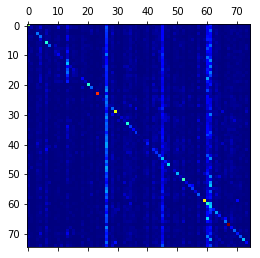

In [43]:
# Plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)

import matplotlib.pyplot as plt
plt.matshow(cm, cmap=plt.cm.jet)
plt.show()

In [ ]:
# using the same vectorizer as for perceptron


In [47]:
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
# TASK: Build a vectorizer / classifier pipeline using the previous analyzer
# the pipeline instance should stored in a variable named clf
clf2 = Pipeline([
    ('vec', vectorizer),
    ('clf', MultinomialNB()),
])

In [49]:
# TASK: Fit the pipeline on the training set
clf2.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vec', TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
   ...lse,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [51]:
# TASK: Predict the outcome on the testing set in a variable named y_predicted
y_predicted = clf2.predict(X_test)

In [52]:
# Print the classification report
from sklearn import metrics
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=T.target_names))

             precision    recall  f1-score   support

          😀       0.34      0.45      0.39      1061
          😁       0.38      0.12      0.18      1015
          😂       0.06      0.25      0.10       955
          🤣       0.44      0.32      0.37      1046
          😃       0.18      0.23      0.21      1009
          😄       0.25      0.25      0.25       983
          😅       0.29      0.34      0.31       967
          😆       0.53      0.34      0.41      1027
          😉       0.12      0.24      0.16      1027
          😊       0.11      0.31      0.16       954
          😋       0.37      0.18      0.24       997
          😎       0.15      0.40      0.21       993
          😍       0.15      0.27      0.20      1022
          😘       0.13      0.33      0.19       974
          😗       0.75      0.25      0.37      1010
          😙       0.45      0.20      0.28       989
          😚       0.39      0.26      0.31      1001
         ☺️       0.64      0.20      0.31   

In [53]:
# Plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

[[473   3  18 ...   4  13  11]
 [ 16 118  46 ...   6  12  12]
 [ 16   4 242 ...   8  16  13]
 ...
 [ 13   1  37 ... 466  37   5]
 [  9   0  62 ...  21 458  10]
 [ 14   3  48 ...  15  15 224]]


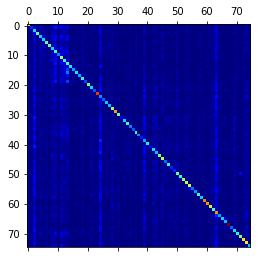

In [54]:
import matplotlib.pyplot as plt
plt.matshow(cm, cmap=plt.cm.jet)
plt.show()

## Training a classifier 2: Perceptron

In [57]:
# TASK: Build a vectorizer that splits strings into sequence of 1 to 3
# characters instead of word tokens
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), analyzer='char',
                             use_idf=False)

In [58]:
type(vectorizer)

sklearn.feature_extraction.text.TfidfVectorizer

In [59]:
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
# TASK: Build a vectorizer / classifier pipeline using the previous analyzer
# the pipeline instance should stored in a variable named clf
clf = Pipeline([
    ('vec', vectorizer),
    ('clf', Perceptron(tol=1e-3)),
])

In [60]:
# TASK: Fit the pipeline on the training set
clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vec', TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
   ..._jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=0.001, verbose=0, warm_start=False))])

In [61]:
# TASK: Predict the outcome on the testing set in a variable named y_predicted
y_predicted = clf.predict(X_test)

In [62]:
# Print the classification report
from sklearn import metrics
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=T.target_names))

             precision    recall  f1-score   support

          😀       0.11      0.64      0.19      1061
          😁       0.44      0.17      0.25      1015
          😂       1.00      0.06      0.11       955
          🤣       0.28      0.45      0.35      1046
          😃       0.88      0.11      0.20      1009
          😄       0.72      0.15      0.25       983
          😅       0.10      0.46      0.16       967
          😆       0.62      0.45      0.52      1027
          😉       0.69      0.13      0.22      1027
          😊       0.86      0.14      0.24       954
          😋       0.42      0.19      0.26       997
          😎       0.59      0.26      0.36       993
          😍       0.67      0.22      0.33      1022
          😘       0.76      0.06      0.12       974
          😗       0.56      0.35      0.43      1010
          😙       0.34      0.33      0.34       989
          😚       0.64      0.30      0.40      1001
         ☺️       0.76      0.25      0.38   

In [76]:
precision_score = metrics.precision_score(y_test, y_predicted,average=None)
recall_score = metrics.recall_score(y_test, y_predicted,average=None)

import matplotlib.pyplot as plt

y = [2.56422, 3.77284, 3.52623, 3.51468, 3.02199]
z = [0.15, 0.3, 0.45, 0.6, 0.75]
n = ["🤗", 651, 393, 203, 123]

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

SyntaxError: invalid character in identifier (<ipython-input-76-74dcf1e002a4>, line 8)

In [77]:
from os.path import join, dirname, abspath
from matplotlib import pyplot
from matplotlib.cbook import get_sample_data
from numpy import linspace
from numpy.core.umath import pi
from numpy.ma import sin
# poo-mark came from emojipedia:
# https://emojipedia-us.s3.amazonaws.com/thumbs/120/apple/96/pile-of-poo_1f4a9.png
poo_img = pyplot.imread(get_sample_data(join(dirname(abspath(__file__)), "poo-mark.png")))
x = linspace(0, 2*pi, num=10)
y = sin(x)
fig, ax = pyplot.subplots()
plot = ax.plot(x, y, linestyle="-")
ax_width = ax.get_window_extent().width
fig_width = fig.get_window_extent().width
fig_height = fig.get_window_extent().height
poo_size = ax_width/(fig_width*len(x))
poo_axs = [None for i in range(len(x))]
for i in range(len(x)):
    loc = ax.transData.transform((x[i], y[i]))
    poo_axs[i] = fig.add_axes([loc[0]/fig_width-poo_size/2, loc[1]/fig_height-poo_size/2,
                               poo_size, poo_size], anchor='C')
    poo_axs[i].imshow(poo_img)
    poo_axs[i].axis("off")
fig.savefig("poo_plot.png")

NameError: name '__file__' is not defined

In [ ]:
😃😊🤔😣🙃
😀🤕🤑😢🤡🤥🤓

In [69]:
metrics.accuracy_score(y_test, y_predicted)

0.29464

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.


F1 = 2 * (precision * recall) / (precision + recall) 
https://github.com/scikit-learn/scikit-learn/blob/f0ab589f/sklearn/metrics/classification.py#L1363

In [120]:
# Plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

[[446   1   2 ...   4   1   5]
 [ 13 153   3 ...   7   0   4]
 [  4   1 209 ...  11   1   1]
 ...
 [  4   1   1 ... 600   2   3]
 [  2   0   0 ...  12 214   2]
 [  3   2   4 ...   4   0 261]]


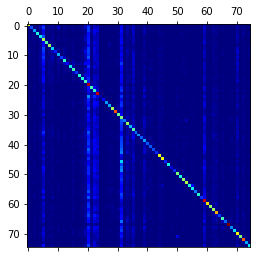

In [121]:
import matplotlib.pyplot as plt
plt.matshow(cm, cmap=plt.cm.jet)
plt.show()

In [123]:
# Predict the result on some short new sentences:
sentences = [
    u'lovely definition: 1. pleasant or enjoyable: 2. beautiful:',
    u'Hate speech is a communication that carries no meaning other than the expression of hatred for some group',
    u'amazing wow love this!!!',
]
predicted = clf.predict(sentences)

In [132]:
print(predicted)
print(T.target_names[22])

[20  5 22 20  5 20 20 20 20 20]
😑


In [142]:
itemlist[-20:]

['Interesting – #CRE firms are now looking for employees with commercial real estate degrees or a business degree wit… https://t.co/A9PkcjpeKq',
 'RT @Posterify: Hey who’s Active and wants some giveaways 🤓',
 'RT @lara_pijuan: #Pathologists from #Eurotime don’t forget to join us at 9 pm on Wednesday 26 😅 Talking about #INSM1 in Neuroendocrine #lun…',
 'Hey who’s Active and wants some giveaways 🤓',
 '@Sulaimanmahruqi @QaisWorld @YouthOfOman Due today 🤓',
 '@eplerjc Please, ‘Jock’ is just a label for calling someone ‘sports nerd’🤓',
 "RT @HarlemMC: #100DaysOfCode I just started .@udacity's Programming for Data Science Nanodegree. 🤓",
 '@JAndASweater 🤣. No really 😖. Hi Sam ~&gt; 🤓',
 "@blueboyjon Come on Ted, that's the oldest one in the book 🤓",
 '@FranklinWomen Can’t wait for good chats, great insight and coffeeeee ☕️☕️☕️😂🤗 See you soon @FranklinWomen ! 🤓💃🌸',
 'https://t.co/bMq5dEPBsj #nerdydirtyfucklove REVENGE OF THE NERD 🤓 .Download now on spinrilla .',
 'RT @abidifactor: Screenshot 

In [129]:
predicted = clf.predict(strList)
print(predicted)

[20  5 22 20  5 20 20 20 20 20]


In [63]:
# save model
fullfile = os.path.expanduser("~/Dropbox/insight_side/"+'clf_0927.p')
with open(fullfile, 'wb') as fp:
    pickle.dump(clf, fp)

In [64]:
vectorizer.get_feature_names()

['\n',
 '\n"',
 '\n" ',
 '\n".',
 '\n"@',
 '\n"_',
 '\n"a',
 '\n"b',
 '\n"c',
 '\n"d',
 '\n"e',
 '\n"f',
 '\n"g',
 '\n"h',
 '\n"i',
 '\n"j',
 '\n"l',
 '\n"m',
 '\n"o',
 '\n"p',
 '\n"q',
 '\n"r',
 '\n"s',
 '\n"t',
 '\n"u',
 '\n"v',
 '\n"w',
 '\n"y',
 '\n"…',
 '\n#',
 '\n# ',
 '\n##',
 '\n#1',
 '\n#2',
 '\n#3',
 '\n#4',
 '\n#5',
 '\n#6',
 '\n#7',
 '\n#8',
 '\n#9',
 '\n#[',
 '\n#a',
 '\n#b',
 '\n#c',
 '\n#d',
 '\n#e',
 '\n#f',
 '\n#g',
 '\n#h',
 '\n#i',
 '\n#j',
 '\n#k',
 '\n#l',
 '\n#m',
 '\n#n',
 '\n#o',
 '\n#p',
 '\n#q',
 '\n#r',
 '\n#s',
 '\n#t',
 '\n#u',
 '\n#v',
 '\n#w',
 '\n#y',
 '\n#z',
 '\n#к',
 '\n#ق',
 '\n#ช',
 '\n#ต',
 '\n#ท',
 '\n#บ',
 '\n#ป',
 '\n#ฟ',
 '\n#ย',
 '\n#ร',
 '\n#เ',
 '\n#โ',
 '\n#…',
 '\n#イ',
 '\n#カ',
 '\n#キ',
 '\n#ク',
 '\n#ド',
 '\n#ㅅ',
 '\n#夏',
 '\n#山',
 '\n#张',
 '\n#心',
 '\n#朱',
 '\n#流',
 '\n#王',
 '\n#电',
 '\n#白',
 '\n#相',
 '\n#緑',
 '\n#갓',
 '\n#강',
 '\n#구',
 '\n#김',
 '\n#꾹',
 '\n#다',
 '\n#데',
 '\n#드',
 '\n#라',
 '\n#메',
 '\n#박',
 '\n#방',
 '\n#뷔',
 '\n#샤',
 '\n#

In [ ]:
np.argsort(classifier.predict_proba(X), axis=1)[-5:]